<hr>
Este material ha sido construido en conjunto con material suministrado por los profesores Pedro Atencio (Instituto Tecnológico Metropolitano), Carlos Mera (Universidad de Medellin), Albeiro Espinosa y Diego Patiño (Universidad Nacional de Colombia, Sede Medellín); a ellos les damos crédito.
<hr>

#  <center> VISIÓN ARTIFICIAL </center>
## Agenda del día


### Unidad 6 - Ruido
<li>Ruido</li>


</ul>

<img src="res/pipeline.png"/>

El objetivo del preprocesamiento es mejorar la calidad y/o la apariencia de la imagen original para su análisis e interpretación.

Se resaltan ciertas características de la imagen (bordes, contraste, …) y se ocultan o eliminan otras  (por ejemplo, el ruido)

El preprocesamiento es una etapa previa que es necesaria para otras fases posteriores del proceso de visión artificial (segmentación, extracción de características, reconocimiento e interpretación).


<img src="res/prepro.png">

En esta ocasión nos centraremos en las operaciones de transformación por vecindario.



In [ ]:
#Importar las liberias
%matplotlib inline

import cv2
import matplotlib.pyplot as plt
import numpy as np

#En este notebook se define una función que facilita la lectura de imágenes
#Leer la imagen en RGB o escala de grises con una sola línea de código
def img_read(filename, mode = 'color'):
    if(mode == 'color'):
        return cv2.cvtColor(cv2.imread(filename),cv2.COLOR_BGR2RGB)
    elif(mode=='grayscale' or mode=='greyscale' or mode == 'gray' or mode == 'grey'):
        return cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    else:
        return None

# 1. EL RUIDO

Las señales del mundo real usualmente tienen diferencias con respecto a la señal ideal que sería producida por nuestro modelo del proceso de generación de la misma. Esas diferencias son conocidas como ruido. El ruido surge como resultado de procesos no-modelados o imposibles de modelar que ocurren en la generación y captura de la señal real, y suele contaminar una imagen y/o degradar su calidad. No es parte de la señal ideal y puede ser causado por una variedad de fuentes, e.g. variaciones en la sensibilidad del sensor, variaciones ambientales, la naturaleza discreta de la radiación, los errores de transmisión o cuantización, etc. Es también posible tratar detalles irrelevantes de la escena como si fueran ruido, por ejemplo: superficies con reflejos, lluvia, niebla, el efecto del agua sobre la luz al tomar fotos bajo la misma. Las caracteristicas del ruido dependen de su fuente, y por tanto, de la fuente también dependerá el operador que mejor reduzca sus efectos (https://homepages.inf.ed.ac.uk/rbf/HIPR2/noise.htm).

Muchos paquetes de procesamiento digital de imágenes contienen operadores para añadir ruido artificial a una imagen. Corromper una imagen deliberadamente con ruido nos permite probar la eficacia y medir el rendimiento de un operador de procesamiento de imágenes para el tratamiento del ruido.


El ruido puede ser agrupado en dos clases:

* **Ruido independiente:**  Producido por fuentes imprevistas. Su distribución es aleatoria y cambiante con el tiempo.
<br><br>
    
* **Ruido deterministico o que depende de los datos de la imagen:** Presenta una forma y apariencia constante para cada sistema en particular. Se manifiesta como una distribución constante y determinada dentro de la imagen. Ejemplos de fenómenos que pueden modelarse como ruido deterministico incluyen la iluminación desbalanceada.
      

El ruido independiente puede ser descrito a menudo por un modelo de ruido aditivo, donde la imagen capturada f(i,j) es la suma de la imagen verdadera s(i,j) y el ruido n(i,j). El ruido independiente a menudo tiene media cero y es descrito por su varianza $\sigma^2$. En muchos casos, el ruido aditivo se distribuye equitativamente en el dominio de la frecuencia. Abordaremos este fenómeno en la siguiente unidad.

## <center> $ f_{i,j} = s_{i,j} + n_{i,j} $ </center>

El ruido deterministico suele describirse por medio de un modelo de ruido multiplicativo, donde la imagen capturada f(i,j) es el producto de la imagen verdadera y el ruido n(i,j):

## <center> $ f_{i,j} = s_{i,j} * n_{i,j} $ </center>

## FORMAS BÁSICAS DE MEDIR EL IMPACTO DEL RUIDO

### - PROPORCIÓN DE SEÑAL A RUIDO (SNR)

El impacto del ruido sobre la imagen puede describirse como la proporción de señal a ruido (SNR), que está dada por:

# <center> $ SNR = \frac{\sigma_{s}^2}{\sigma_{n}^2} = \sqrt{ \frac{ \sigma_{f}^2}{\sigma_{n}^2}   - 1   } $ </center>

Donde $\sigma_{s}^2$ es el ruido de la imagen ideal y $\sigma_{f}^2$ el ruido de la imagen capturada.

### - ERROR CUADRÁTICO MEDIO (MSE)

El error cuadrático medio (MSE) mide el promedio de los errores, es decir, mide el promedio de los cuadrados de los errores. Es decir, mide la diferencia promedio cuadrada entre los valores aproximados y los reales.

# <center> $ MSE = \frac{ \sum_{i}^{M}{ \sum_{j}^{N}{ \sum_{k}^{C}{ (F_{i,j,k} - S_{i,j,k})^2 }  }  } }{M\cdot N \cdot C} $ </center>

Donde $M$ es la cantidad de filas, $N$ es la cantidad de columnas, y $C$ la cantidad de canales de color.


### - PROPORCIÓN MÁXIMA DE SEÑAL A RUIDO (PSNR)

La Proporción Máxima de Señal a Ruido o PSNR (del inglés Peak Signal-to-Noise Ratio) es un término utilizado en ingeniería para definir la relación entre la máxima energía posible de una señal y el ruido que afecta a su representación fidedigna. Debido a que muchas señales tienen un gran rango dinámico, el PSNR se expresa generalmente en escala logarítmica, utilizando como unidad el decibelio.

El uso más habitual del PSNR es como medida cuantitativa de la calidad de la reconstrucción en el ámbito de la compresión de imágenes. Para definirla se hace indispensable la formulación del error cuadrático medio.

## <center> $ PSNR = 20 \cdot \log_{10}{\frac{MAX_I}{\sqrt{MSE}}}  $ </center>

Donde $MAX_I$ denota el máximo valor que puede tomar un píxel en la imagen. Cuando éstos se representan usando $B$ bits por muestra, $MAX_I = 2^B - 1$. En el caso de una imagen de 8 bits, el valor de $MAX_I$ sería 255.



## TIPOS DE RUIDO


### - Ruido Gaussiano

El Ruido Gaussiano (o normal) modela el ruido producido por los circuitos electrónicos o ruido de los sensores por falta de iluminación y/o altas temperaturas. Un ejemplo de este tipo de ruido es el provocado en el revelado de las películas.

<center><i>Figura. Campana de Gauss.</i></center>
<img src="res/ruido/gauss.gif" alt="operaciones" style="height:400px"></img>
<br>

El ISO de una cámara también tiene un impacto notorio sobre las imágenes que se toman con esta. Por esto es uno de los parámetros más importantes a registrar al momento de llevar a cabo la adquisición.

<center><i>Figura. Arriba, una fotografía tomada con ISO100, debajo, la misma fotografía pero con ISO1600.</i></center>
<img src="res/ruido/iso.jpg" alt="operaciones" style="height:400px"></img>

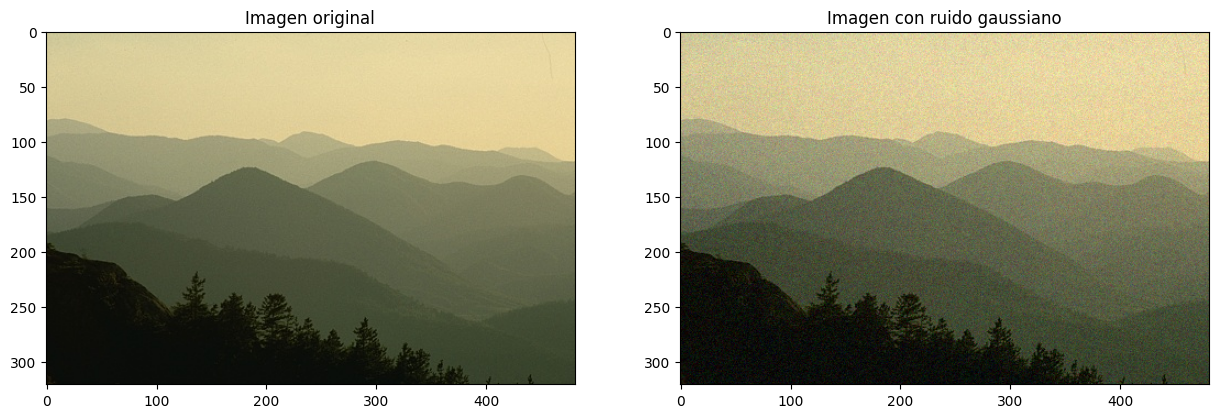

In [ ]:
#Importar librerias
%matplotlib inline

import cv2
import matplotlib.pyplot as plt
import numpy as np

#Definir la función ruido gaussiano
def gaussian_noise(img, std = 0.02):
    #Las variables row, col y ch dependen de la imagen de entrada y sus componentes
    mean = 0
    row = img.shape[0]
    col = img.shape[1]
    ch =  img.shape[2] if len(img.shape) == 3 else 1
    #Definir la matriz de ceros noisy  del mismo tamaño que la imagen original
    noisy = np.zeros(img.shape, np.float64)
    #Generar una distribución normal a partir del comando de numpy
    gauss = np.random.normal(mean,std,(row,col,ch)) if ch > 1 else np.random.normal(mean,std,(row,col))
    gauss = gauss.reshape(row,col,ch)               if ch > 1 else gauss.reshape(row,col)
    #La imagen con ruido gaussiano es la suma de la imagen de entrada con la procesada
    noisy =  img + gauss
    #Ajustar los datos para que estén entre 0 y 255
    noisy[noisy<0] = 0
    noisy[noisy>255] = 255
    return noisy


#Escribir la desviación estandar y leer la imagen a color
std = 10
img = img_read('res/ruido/mountains.jpg', 'color')

#Aplicar ruido gaussiano y darle tipo de dato uint8
res = gaussian_noise(img, std)
res = res.astype(np.uint8)

#Generar un subplot 1x2 para mostrar la imagen original y la imagen con ruido gaussiano
fig, arreglo_plots = plt.subplots(1,2, figsize=(15, 15))

arreglo_plots[0].set_title('Imagen original')
arreglo_plots[0].imshow(img, cmap="gray")

arreglo_plots[1].set_title('Imagen con ruido gaussiano')
arreglo_plots[1].imshow(res, cmap="gray")

## - Ruido impulsivo o de sal y pimienta

El Ruido Impulsivo (o Sal y Pimienta) se produce normalmente en la cuantificación que se realiza en el proceso de digitalización y es muy común en la transmisión. Los píxeles corrompidos son colocados ya sea como el máximo valor (que luce como nieve en imagenes a escala de grises) o tienen bits individuales cambiados de valor. En algunos casos, los pixeles se establecen de forma alternada como 0 o como el valor máximo, dándole a la imagen una apariencia de 'sal y pimienta'. Los píxeles que no se ven afectados se mantienen igual.
<br><br>
Defectos que contribuyen a este tipo incluyen un CCD defectuoso, que realizará una captura errónea. El ruido normalmente está cuantificado por el porcentaje de píxeles (o sensores) que están corrompidos.
<br>

<center><i>Figura. Ejemplo de ruido sal y pimienta.</i></center>
<img src="res/ruido/sp.png" alt="operaciones" style="height:400px"></img>
<br>

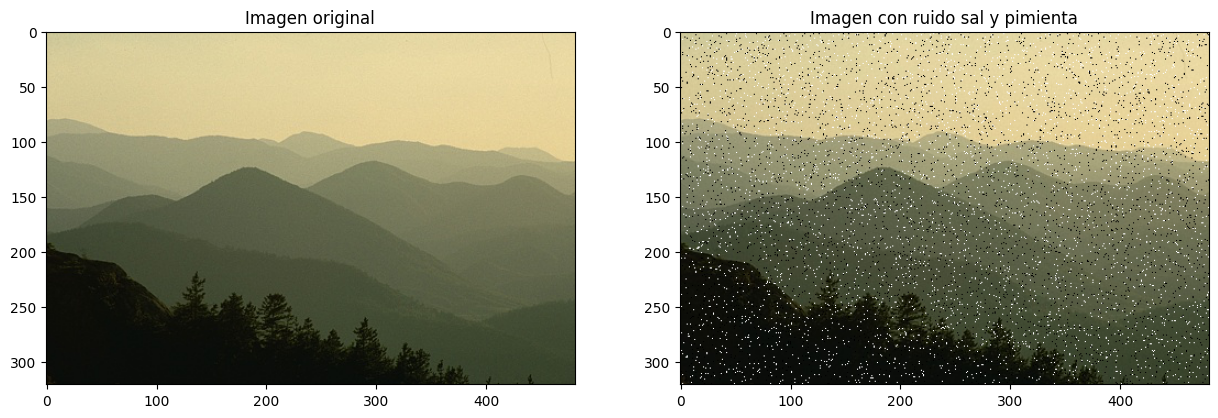

In [ ]:
#Importar librerias
%matplotlib inline


import cv2
import matplotlib.pyplot as plt
import numpy as np

#Definir la función de ruido impulsivo
def sp_noise(img, amount=0.05):
    """
    Agrega ruido de sal y pimienta a una imagen en escala de grises o en color.
    :param img: imagen de entrada (numpy array).
    :param porcentaje: porcentaje de píxeles que se convertirán en ruido de sal o pimienta (valor entre 0 y 1).
    :return: imagen con ruido de sal y pimienta (numpy array).
    """
    img_ruido = img.copy()
    # Agregar ruido a cada canal de color por separado
    if len(img.shape) == 2:
        black = 0
        white = 255
    else:
        black = np.array([0, 0, 0], dtype='uint8')
        white = np.array([255, 255, 255], dtype='uint8')
    probs = np.random.random(img_ruido.shape[:2])
    img_ruido[probs < (amount / 2)] = black
    img_ruido[probs > 1 - (amount / 2)] = white
    return img_ruido
#np.random.uniform()
#Dar valores a los parámetros de entrada de la función ruido
amount = 0.05

#Leer imagen de entrada
img = img_read('res/ruido/mountains.jpg', 'color')
#Aplicar la función ruido y volver el tipo de dato uint8
res = sp_noise(img, amount)
res = res.astype(np.uint8)

#Generar un subplot 1x2 para mostrar imagen original e imagen con ruido sal y pimienta
fig, arreglo_plots = plt.subplots(1,2, figsize=(15, 15))

arreglo_plots[0].set_title('Imagen original')
arreglo_plots[0].imshow(img, cmap="gray")

arreglo_plots[1].set_title('Imagen con ruido sal y pimienta')
arreglo_plots[1].imshow(res, cmap="gray")

## - Ruido poisson o de disparo

El ruido presente en las partes más oscuras de una imagen suele ser causado por variaciones en el número de fotones capturados a un nivel dado de exposición. Este ruido se conoce como ruido Poisson o de disparo. El ruido de disparo está dado por una distribución Poisson, que excepto a niveles muy bajos de intensidad se aproxima a una distribución Gaussiana. En cualquier caso, la media de la distribución de poisson que genera el ruido está dada por los valores locales de intensidad de la imagen.


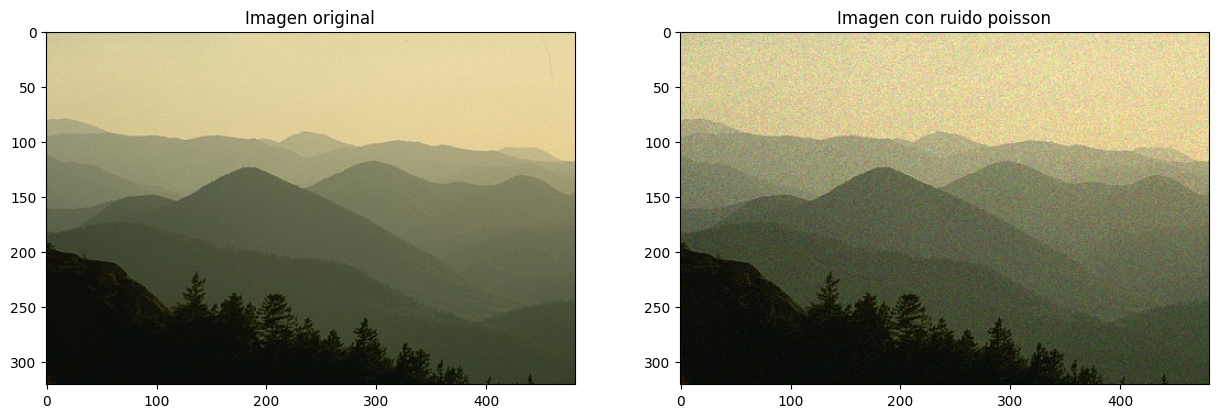

In [ ]:
#Importar librerias
%matplotlib inline

import cv2
import matplotlib.pyplot as plt
import numpy as np

#Definir la función ruido de Poisson
def poisson_noise(img):

    #Se aplica el comando de numpy random.poisson a la imagen de entrada
    # Por defecto es 1 la media
    # Ecuación de probabilidad P(x) = (e^(-lambda) * lambda^x) / x!
    noisy = np.random.poisson(img)
    #Los valores deben estar entre 0 y 255
    noisy[noisy<0] = 0
    noisy[noisy>255] = 255
    return noisy

#Leer la imagen de entrada
img = img_read('res/ruido/mountains.jpg', 'color')

#dist_width = 1

#Aplicar ruido de Poisson a la imagen y volver al tipo de dato uint8
res = poisson_noise(img)
res = res.astype(np.uint8)

#Generar el subplot 1x2 para mostrar imagen original e imagen ruidosa
fig, arreglo_plots = plt.subplots(1,2, figsize=(15, 15))

arreglo_plots[0].set_title('Imagen original')
arreglo_plots[0].imshow(img, cmap="gray", vmin=0, vmax=255)

arreglo_plots[1].set_title('Imagen con ruido poisson')
arreglo_plots[1].imshow(res, cmap="gray", vmin=0, vmax=255)




## - Ruido granular o speckle

El ruido speckle aparece en imágenes con iluminación coherente, como las de scanner ultrasónico, sonar y radar de abertura sintética (SAR). Este ruido se desvía del modelo clásico, en el que se supone ruido Gaussiano, independiente de la señal y adicionado al verdadero valor. El speckle, en cambio, es multiplicativo y no Gaussiano (en los formatos intensidad y amplitud), y dificulta la interpretación de las imágenes porque el “efecto de sal y pimienta” corrompe la información o verdad del terreno. Fuente: <a> http://www.aet.org.es/?q=revista17-7</a>

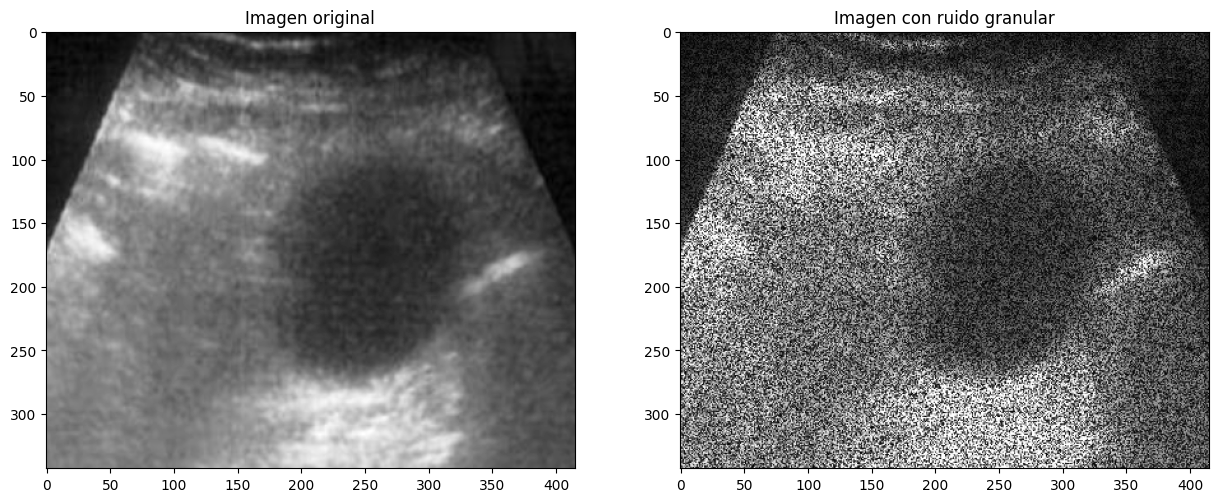

In [ ]:
#Importar librerías
%matplotlib inline

import cv2
import matplotlib.pyplot as plt
import numpy as np

#La función de distribución de probabilidad estadística uniforme es de la forma (1/b-a)
#Definir la función ruido granular
def speckle_noise(img, dist_width):

    #Obtener los valores de row, col, ch de la imagen de entrada
    row = img.shape[0]
    col = img.shape[1]
    ch =  img.shape[2] if len(img.shape) == 3 else 1
    #Crear la copia de la imagen de entrada
    noisy = img.copy()
    #Modelar el ruido granular como una distribución uniforme
    uni_noise = np.random.uniform(-dist_width,dist_width,(row,col,ch)) if ch > 1 else np.random.uniform(-dist_width,dist_width,(row,col))

    #Se ajusta el tamaño de la imagen con ruido
    uni_noise = uni_noise.reshape(row,col,ch)   if ch > 1 else uni_noise.reshape(row,col)
    #Obtener la imagen ruidosa y ajustarla con datos entre 0 y 255
    noisy = img + img * uni_noise
    noisy[noisy<0] = 0
    noisy[noisy>255] = 255
    return noisy

#Leer la imagen de entrada
img = img_read('res/ruido/ultrasonido.png', 'gray')
dist_width = 1

#Aplicar la función ruido granular sobre la imagen de entrada
res = speckle_noise(img, dist_width)
res = res.astype(np.uint8)

#Generar un subplot 1x2 para mostrar imagen original e imagen ruidosa
fig, arreglo_plots = plt.subplots(1,2, figsize=(15, 15))

arreglo_plots[0].set_title('Imagen original')
arreglo_plots[0].imshow(img, cmap="gray")

arreglo_plots[1].set_title('Imagen con ruido granular')
arreglo_plots[1].imshow(res, cmap="gray")

